In [10]:
import sys

sys.path.append("../../src/groundstate_prep")
from ground_state_prep import prepare_ground_state
from ground_state_prep_qiskit import get_error_from_sv, prepare_ground_state_qiskit

sys.path.append("../../src/lindbladian")
from lindbladian import ideal_lindbladian, circuit_implementation_lindbladian
from utils_lind import crandn

In [14]:
# Hamiltonian.

import numpy as np
from numpy import linalg as LA
import qib
import matplotlib.pyplot as plt

# Parameters for the Ising Hamiltonian
# L has to be even! Due to K only being able to control even Ls!
L, J, g = (4, 1, 1)

# construct Hamiltonian
rng = np.random.default_rng(42)
hamil = crandn((2**L, 2**L), rng)
hamil = (hamil + hamil.conj().T) * 0.5

eigenvalues, eigenvectors = LA.eig(hamil)
idx = eigenvalues.argsort()
eigenvalues_sort = eigenvalues[idx]

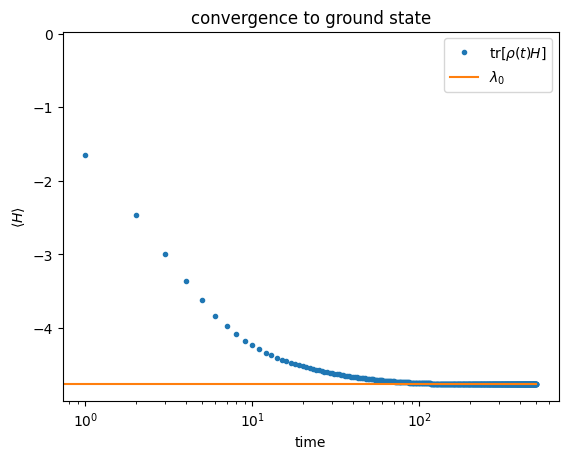

In [15]:
# Ideal Lindbladian Simulation.
tau = 1
nsteps = 500
rho, en_list = ideal_lindbladian(hamil, L, tau, nsteps)

plt.semilogx(tau * np.arange(nsteps + 1), en_list, ".", label=r"$\mathrm{tr}[\rho(t) H]$")
plt.semilogx(tau * np.arange(nsteps + 1), eigenvalues_sort[0]*np.ones(nsteps + 1), label=r"$\lambda_0$")
plt.legend()
plt.xlabel("time")
plt.ylabel(r"$\langle H \rangle$")
plt.title("convergence to ground state")
plt.show() 

In [16]:
from qiskit.quantum_info import state_fidelity
lamb, v = LA.eig(rho)
psi = np.sqrt(lamb[0])*v[:, 0]
for i in range(1, len(lamb)):
    psi += np.sqrt(lamb[i])*v[:, i]

print(lamb.real)
psi = v[:, 0] / np.linalg.norm(v[:, 0])
print("Abs Error of the Approx: ", np.linalg.norm(np.vdot(psi, hamil@psi) - eigenvalues_sort[0]))

[9.99245245e-01 6.19198094e-04 8.09376394e-05 2.61872773e-05
 1.16466206e-05 6.37924874e-06 3.76411416e-06 2.30052417e-06
 2.05037493e-06 1.00980937e-06 5.63525276e-07 2.91707690e-09
 2.45125776e-08 1.08565783e-07 2.56731269e-07 3.25096444e-07]
Abs Error of the Approx:  0.0006663957014216848
